## Walkthrough of Data Science - Traveler

### * Goal: Predict the country that users will make their first booking in, based on some basic user profile data.


#### [1] Pre-processing: Assessing and analyzing data, cleaning, transforming and adding new features
#### [2] Learning model: Constructing and testing learning model
#### [3] Post-processing: Creating final predictions


# LAB 1 CODE

In [3]:
##Exploring Traveler data
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline 

print("Reading data...")
train_file = "train_users_2.csv"
df_train = pd.read_csv(train_file, header = 0,index_col=None)

test_file = "test_users.csv"
df_test = pd.read_csv(test_file, header = 0,index_col=None)

# Combining into one dataset for cleaning
df_all = pd.concat((df_train, df_test), axis=0, ignore_index=True)
print("Reading data...completed")

# Fixing date formats in Pandas - to_datetime
## Change dates to specific format
print("Fixing timestamps...")
df_all['date_account_created'] = pd.to_datetime(df_all['date_account_created'], format='%Y-%m-%d')
df_all['timestamp_first_active'] = pd.to_datetime(df_all['timestamp_first_active'], format='%Y%m%d%H%M%S')
print("Fixing timestamps...completed")

## Removing date_first_booking column
df_all.drop('date_first_booking', axis = 1, inplace = True)
print("Droped date_first_booking column...")

import numpy as np

## Remove outliers function - [1]
def remove_outliers(df, column, min_val, max_val):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<=min_val, col_values>=max_val), np.NaN, col_values)
    return df

## Fixing age column - [2]
print("Fixing age column...")
df_all = remove_outliers(df = df_all, column = 'age', min_val = 15, max_val = 90)
df_all['age'].fillna(-1, inplace = True)
print("Fixing age column...completed")

# Other column missing value - Fill first_affiliate_tracked column
print("Filling first_affiliate_tracked column...")
df_all['first_affiliate_tracked'].fillna(-1, inplace=True)
print("Filling first_affiliate_tracked column...completed")

df_all.head()

Populating the interactive namespace from numpy and matplotlib
Reading data...
Reading data...completed
Fixing timestamps...
Fixing timestamps...completed
Droped date_first_booking column...
Fixing age column...
Fixing age column...completed
Filling first_affiliate_tracked column...
Filling first_affiliate_tracked column...completed


/home/amaresh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in less_equal
/home/amaresh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in greater_equal


,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,-1.0,NDF,2010-06-28,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,2009-03-19 04:32:55
1,seo,google,38.0,NDF,2011-05-25,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,2009-05-23 17:48:09
2,direct,direct,56.0,US,2010-09-28,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,2009-06-09 23:12:47
3,direct,direct,42.0,other,2011-12-05,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,2009-10-31 06:01:29
4,direct,direct,41.0,US,2010-09-14,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,2009-12-08 06:11:05


In [16]:
#plotting the bar graph for signup_app vs devices
temp1 = df_all[['signup_app','first_device_type'] ]
temp1 = temp1.groupby(["signup_app",'first_device_type'])
temp1 = pd.DataFrame(temp1.size().reset_index(name = "Group_Count"))
temp1

,signup_app,first_device_type,Group_Count
0,Android,Android Phone,5717
1,Android,Android Tablet,406
2,Android,Desktop (Other),8
3,Android,Mac Desktop,102
4,Android,Other/Unknown,4035
5,Android,SmartPhone (Other),2
6,Android,Windows Desktop,215
7,Android,iPad,21
8,Android,iPhone,13
9,Moweb,Android Phone,1760


Android device list


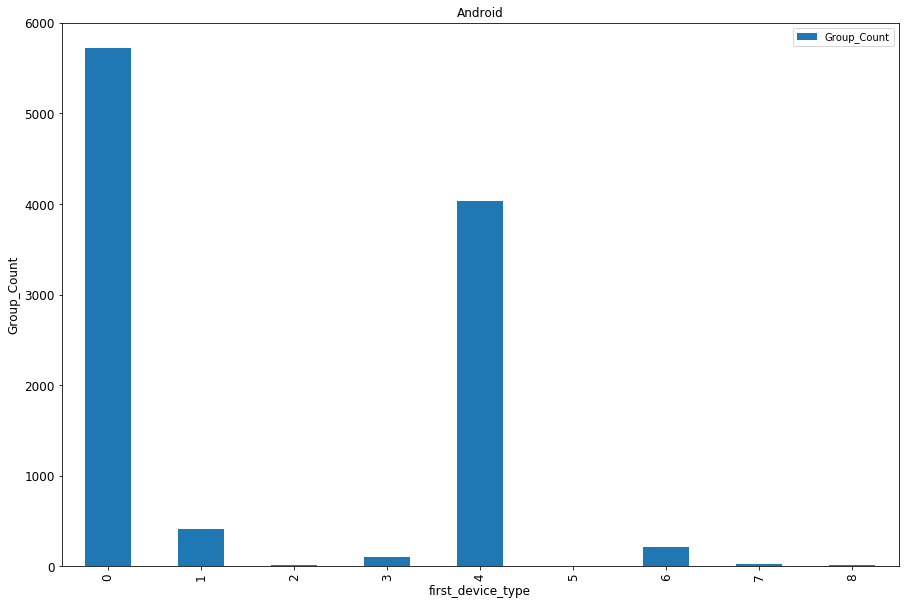

In [17]:
print("Android device list")
k1 = temp1.loc[(temp1.signup_app == "Android"), ['signup_app', 'first_device_type' ,'Group_Count']]
android = k1[['first_device_type' , 'Group_Count']]
android

ax = android[['first_device_type','Group_Count']].plot(kind='bar', title ="Android", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("first_device_type", fontsize=12)
ax.set_ylabel("Group_Count", fontsize=12)
plt.show()

Moweb device list


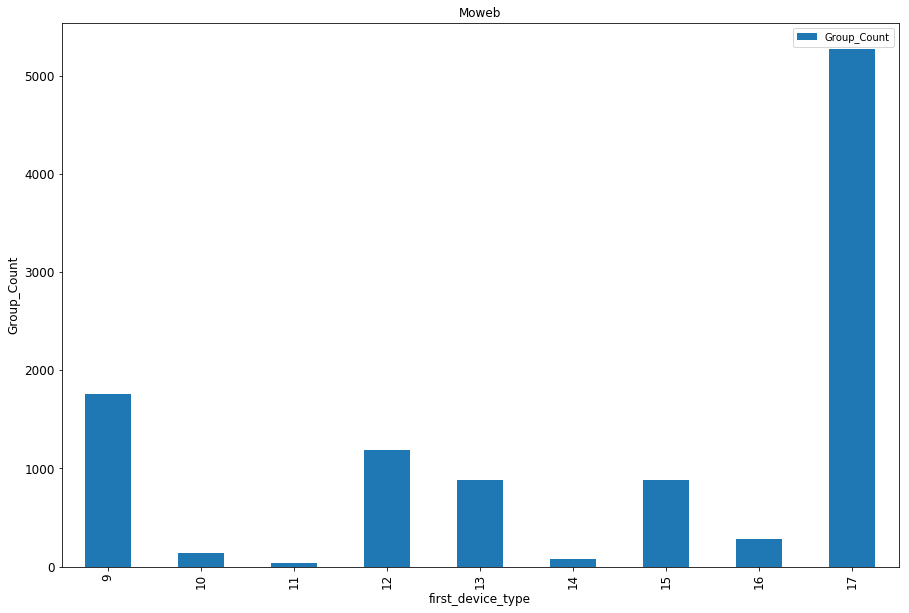

In [13]:
print("Moweb device list")
k1 = temp1.loc[(temp1.signup_app == "Moweb"), ['signup_app', 'first_device_type' ,'Group_Count']]
Moweb = k1[['first_device_type' , 'Group_Count']]
Moweb

ax = Moweb[['first_device_type','Group_Count']].plot(kind='bar', title ="Moweb", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("first_device_type", fontsize=12)
ax.set_ylabel("Group_Count", fontsize=12)
plt.show()

Web device list


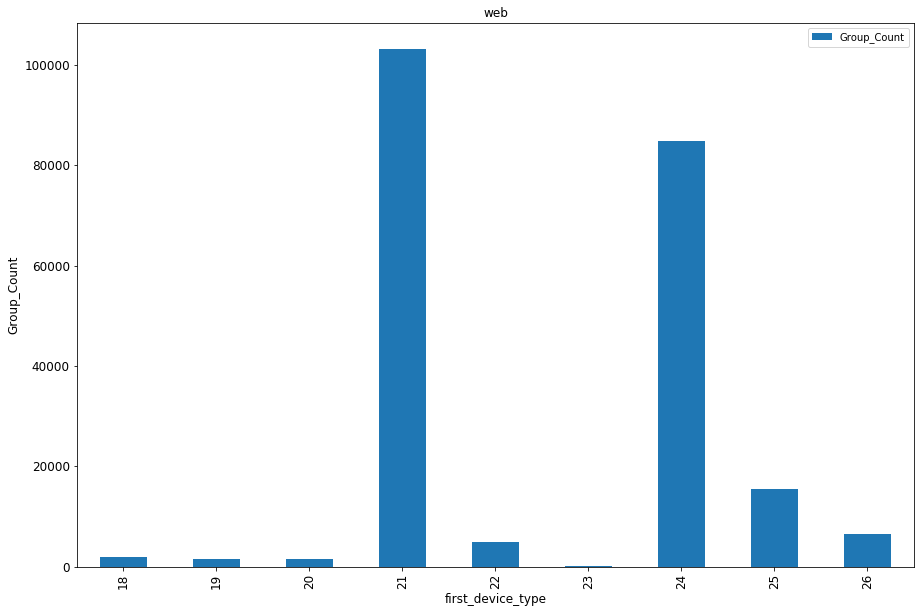

In [14]:
print("Web device list")
k1 = temp1.loc[(temp1.signup_app == "Web"), ['signup_app', 'first_device_type' ,'Group_Count']]
Web = k1[['first_device_type' , 'Group_Count']]
Web

ax = Web[['first_device_type','Group_Count']].plot(kind='bar', title ="web", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("first_device_type", fontsize=12)
ax.set_ylabel("Group_Count", fontsize=12)
plt.show()

iOS device list


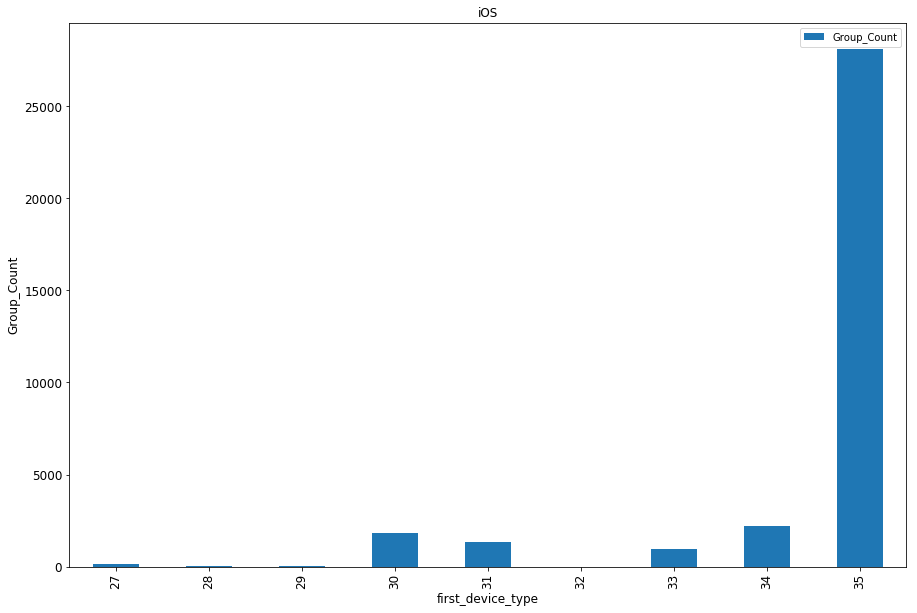

In [15]:
print("iOS device list")
k1 = temp1.loc[(temp1.signup_app == "iOS"), ['signup_app', 'first_device_type' ,'Group_Count']]
iOS = k1[['first_device_type' , 'Group_Count']]
iOS

ax = iOS[['first_device_type','Group_Count']].plot(kind='bar', title ="iOS", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("first_device_type", fontsize=12)
ax.set_ylabel("Group_Count", fontsize=12)
plt.show()

In [20]:
def convert_to_binary(df , column_to_convert):
    catergories = list(df[column_to_convert].drop_duplicates())
    
    for category in catergories:
        cat_name = str(category).replace(" ","_").replace("(","").replace(")","").replace("/","_").replace("-","").lower()
        col_name = column_to_convert[:5]+ "_" +cat_name[:10]
        df[col_name] = 0
        df.loc[(df[column_to_convert] == category), col_name] = 1
        
    return df

print("One Hot Encoding categorical data")
columns_to_convert = ['gender' , 'signup_method' , 'signup_flow' , 'language' ,'affiliate_channel' , 'affiliate_provider',
                      'first_affiliate_tracked' , 'signup_app' , 'first_device_type' , 'first_browser']

for column in columns_to_convert:
    df_all  = convert_to_binary(df = df_all , column_to_convert = column)
    df_all.drop(column , axis = 1 , inplace =  True)
print("One Hot Encoding categorical data completed")

One Hot Encoding categorical data
One Hot Encoding categorical data completed


In [21]:
df_all.head()

,age,country_destination,date_account_created,id,timestamp_first_active,gende_unknown,gende_male,gende_female,gende_other,signu_facebook,...,first_theworld_b,first_slimbrowse,first_epic,first_stainless,first_googlebot,first_outlook_20,first_icedragon,first_ibrowse,first_nintendo_b,first_uc_browser
0,-1.0,NDF,2010-06-28,gxn3p5htnn,2009-03-19 04:32:55,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,38.0,NDF,2011-05-25,820tgsjxq7,2009-05-23 17:48:09,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,56.0,US,2010-09-28,4ft3gnwmtx,2009-06-09 23:12:47,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,42.0,other,2011-12-05,bjjt8pjhuk,2009-10-31 06:01:29,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,41.0,US,2010-09-14,87mebub9p4,2009-12-08 06:11:05,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#Add new date related fileds 
print("Adding new fields....")
df_all['day_account_created'] = df_all['date_account_created'].dt.weekday
df_all['month_account_created'] = df_all['date_account_created'].dt.month
df_all['quarter_account_created'] = df_all['date_account_created'].dt.quarter
df_all['year_account_created'] = df_all['date_account_created'].dt.year
df_all['hour_first_active'] = df_all['timestamp_first_active'].dt.hour
df_all['day_first_active'] = df_all['timestamp_first_active'].dt.weekday
df_all['month_first_active'] = df_all['timestamp_first_active'].dt.month
df_all['quarter_first_active'] = df_all['timestamp_first_active'].dt.quarter
df_all['year_first_active'] = df_all['timestamp_first_active'].dt.year
df_all['created_less_active'] = (df_all['date_account_created'] - df_all['timestamp_first_active']).dt.days

print("Adding new fields....completed")

# Drop unnessary columns 
print("Droping fields....")
columns_to_drop = ['date_account_created','timestamp_first_active','date_first_booking','country destination']

for column in columns_to_drop :
    if column in df_all.columns :
        df_all.drop(column , axis = 1 , inplace = True)

print("Dropping fields .. completed")

Adding new fields....
Adding new fields....completed
Droping fields....
Dropping fields .. completed


In [23]:
df_all.head()

,age,country_destination,id,gende_unknown,gende_male,gende_female,gende_other,signu_facebook,signu_basic,signu_google,...,day_account_created,month_account_created,quarter_account_created,year_account_created,hour_first_active,day_first_active,month_first_active,quarter_first_active,year_first_active,created_less_active
0,-1.0,NDF,gxn3p5htnn,1,0,0,0,1,0,0,...,0,6,2,2010,4,3,3,1,2009,465
1,38.0,NDF,820tgsjxq7,0,1,0,0,1,0,0,...,2,5,2,2011,17,5,5,2,2009,731
2,56.0,US,4ft3gnwmtx,0,0,1,0,0,1,0,...,1,9,3,2010,23,1,6,2,2009,475
3,42.0,other,bjjt8pjhuk,0,0,1,0,1,0,0,...,0,12,4,2011,6,5,10,4,2009,764
4,41.0,US,87mebub9p4,1,0,0,0,0,1,0,...,1,9,3,2010,6,1,12,4,2009,279


In [24]:
df_session  =  pd.read_csv("session", header = 0,index_col=None)

FileNotFoundError: File b'session' does not exist

In [ ]:
print("Determing primary device... ")
sessions_device = df_sessions.loc[:,['user_id' , 'device_type', 'secs_elapsed']]

aggregated_lvl1 = sessions_device.groupby(['user_id','device_type'], as_index = False , sort=False).aggregate(np.sum)

#aggregated_lvl1.head(10)
idx = aggregated_lvl1.groupby(['user_id'], sort=False)['secs_elapsed'].transform(max) == aggregated_lvl1['secs_elapsed']

#idx.head(10
df_sessions_primary = pd.DataFrame(aggregated_lvl1.loc[idx , ["user_id","device_type" , "secs_elapsed"]])

df_sessions_primary =
